# Credit Risk Assessment

#### Riddhi Maiti

We are building a model that predicts the likelihood of a borrower defaulting on a loan, helping financial institutions make informed lending decisions

## Getting Started

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore") 

In [7]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


An overview of data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Few missing values there!

#### Feature Description :

Descriptive Statistics

In [12]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## EDA

Let's try to visualize all the data in this pairplot

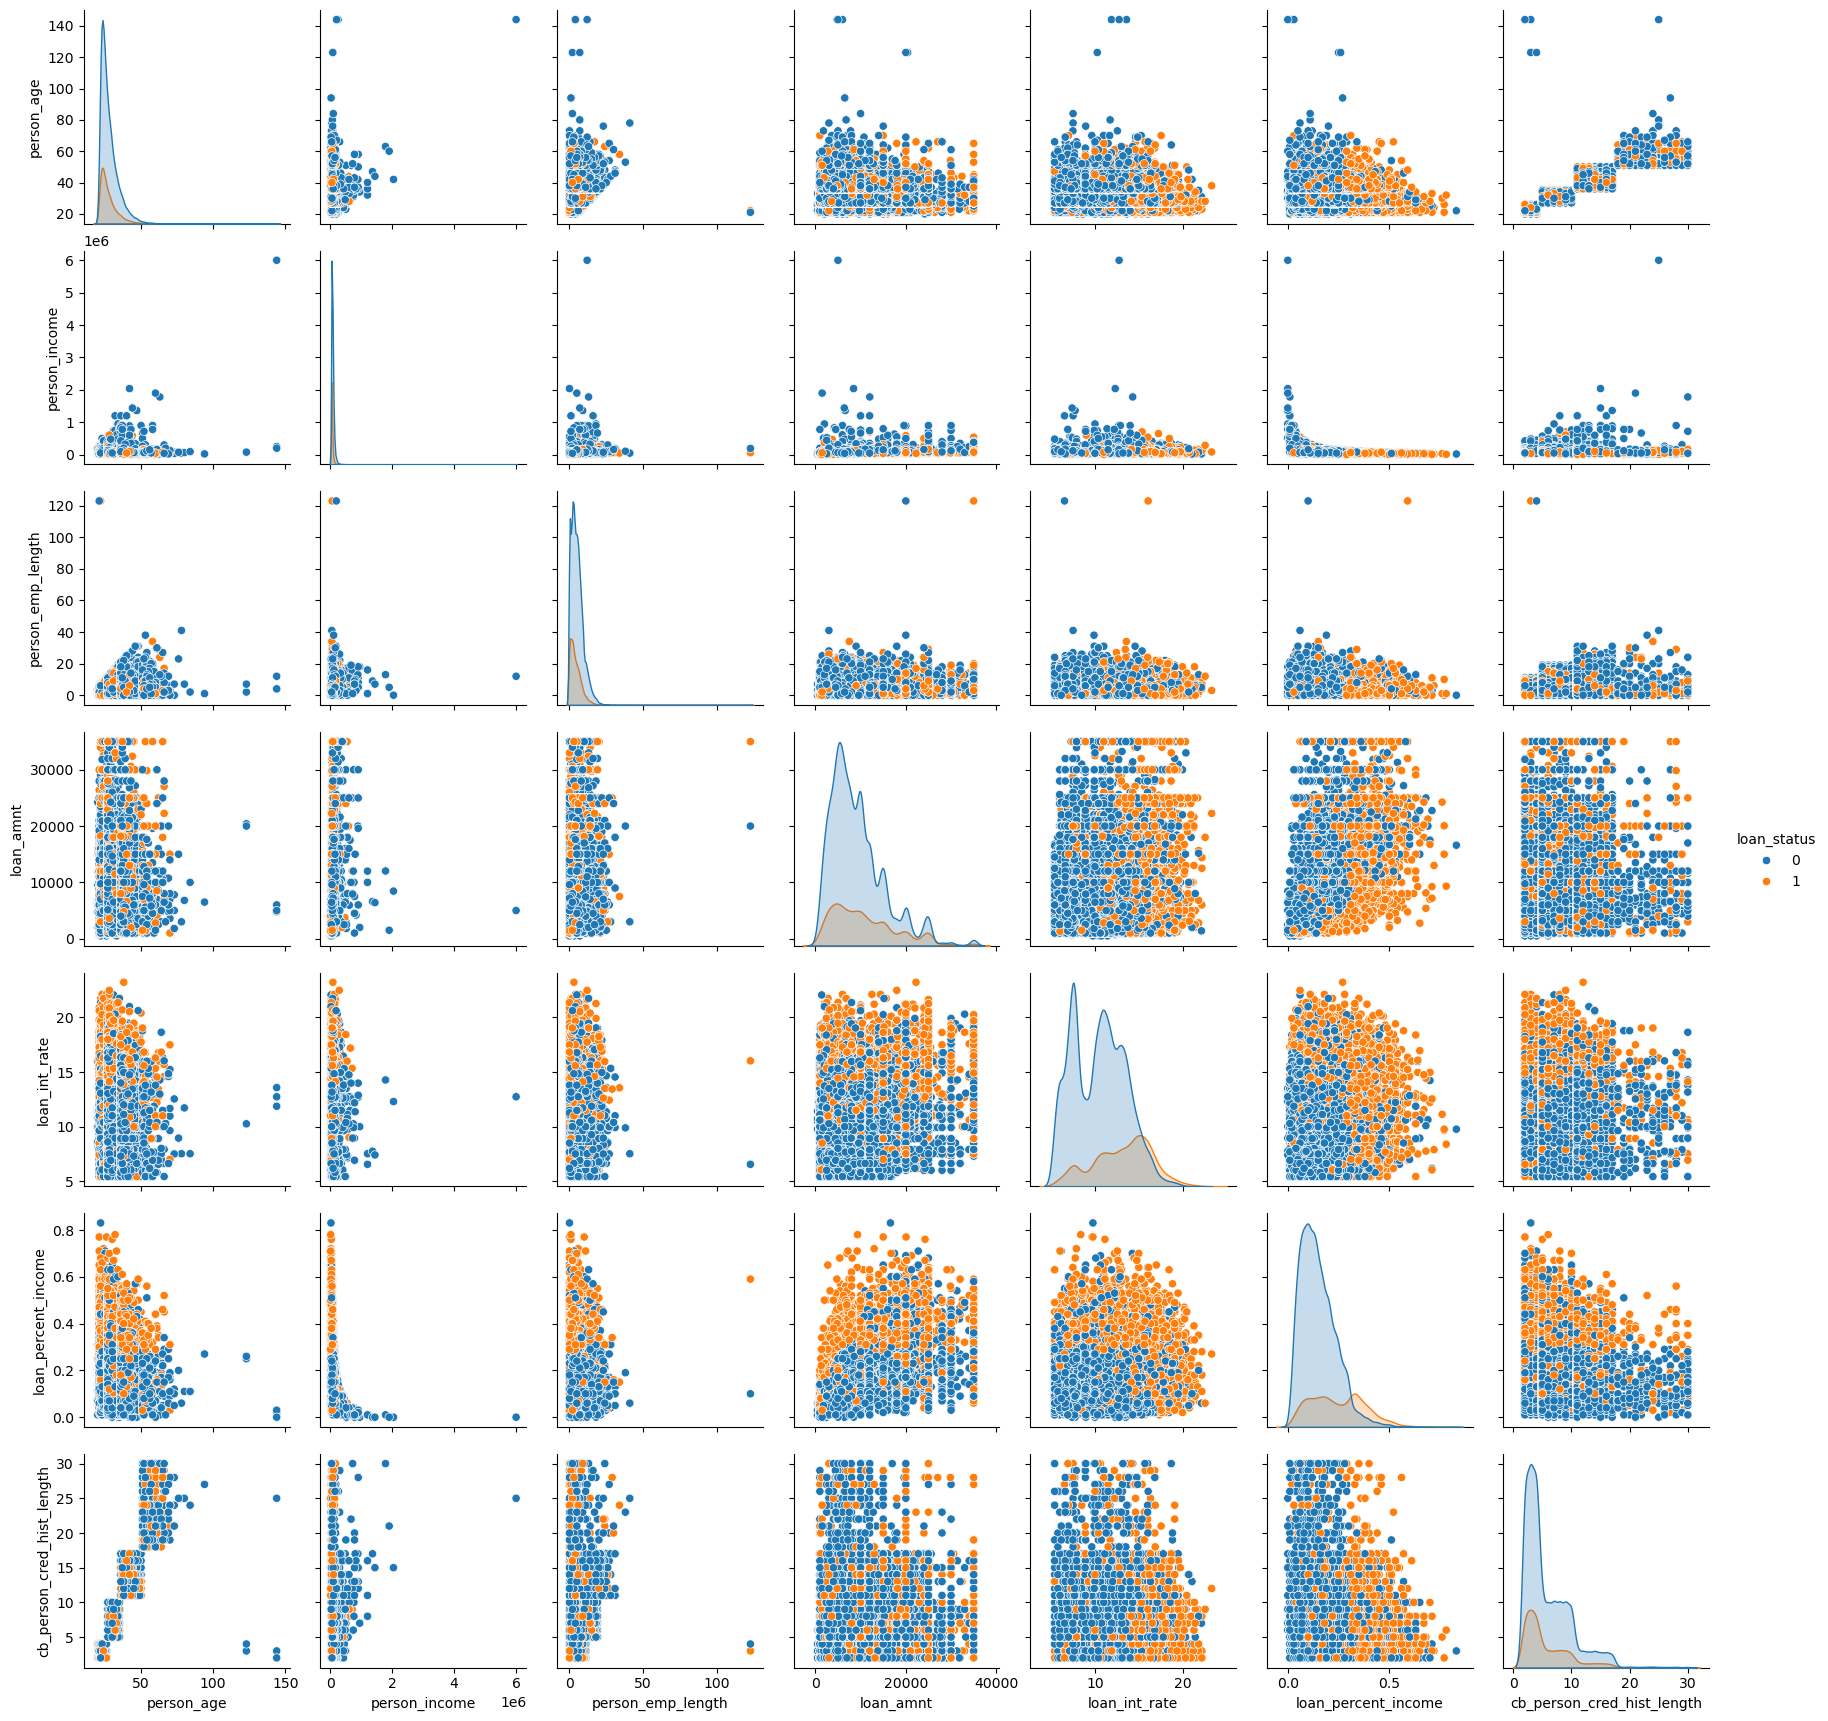

In [15]:
sns.pairplot(df,hue='loan_status')

Heatmap of correlation b/w all the features

<Axes: >

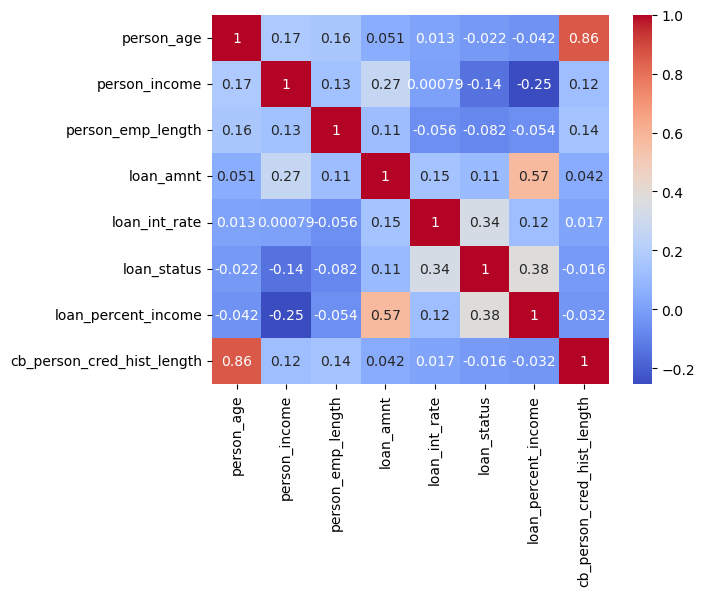

In [17]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

We are now visualizing the data for the intent of the loans

<Axes: xlabel='loan_intent', ylabel='count'>

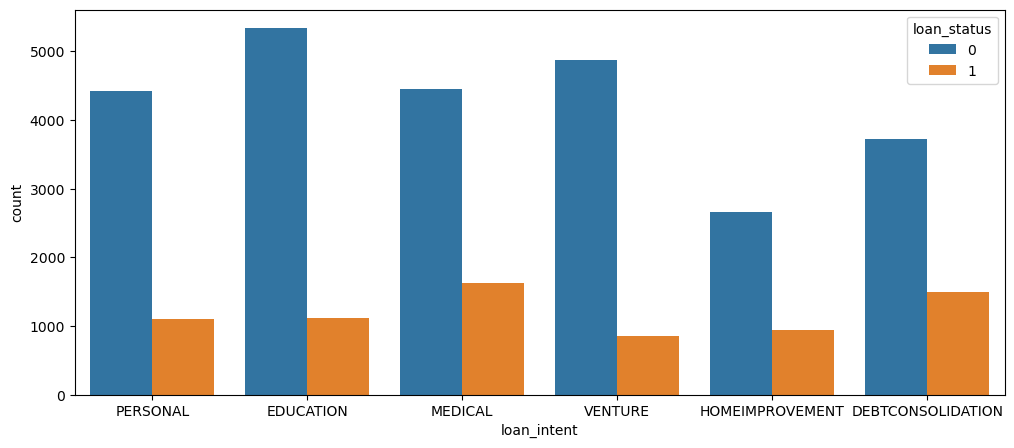

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='loan_intent',hue='loan_status')

<Axes: xlabel='cb_person_cred_hist_length', ylabel='Count'>

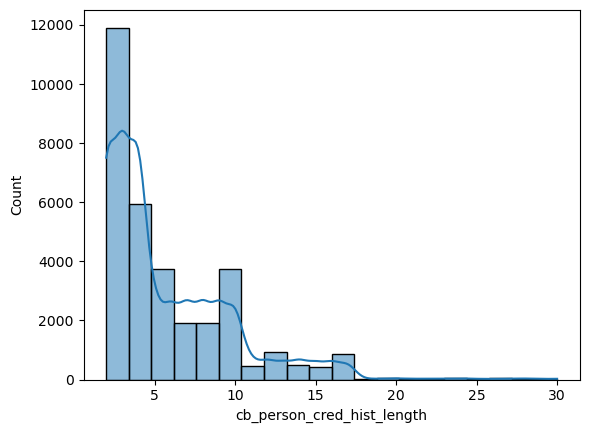

In [20]:
sns.histplot(df['cb_person_cred_hist_length'],bins=20,kde=True)

Many people have their credit accounts open for just few months

<Axes: xlabel='loan_status', ylabel='count'>

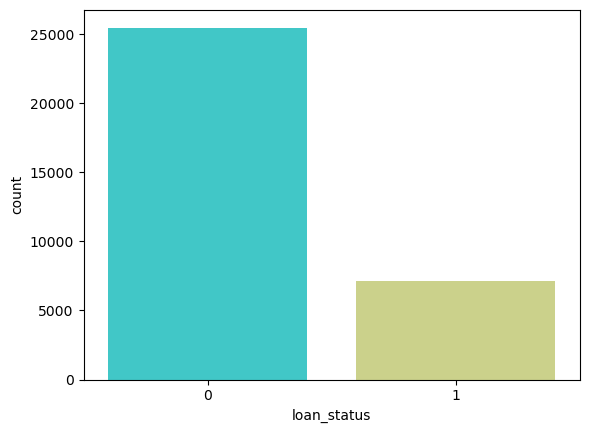

In [22]:
sns.countplot(data=df,x='loan_status',palette='rainbow')

In [23]:
df['loan_status'].sum()/df['loan_status'].count()*100

21.816396059052824

This shows that our data is kind of non-uniformly distributed

## Data Preprocessing

Let's find out which features have missing values

In [27]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

person_emp_legth and loan_int_rate have missing values

At first, let's fill the missing values of person_emp_length

In the pairplot and the correlation heatmap we saw that person_emp_length has some kind of linear relation with person_age

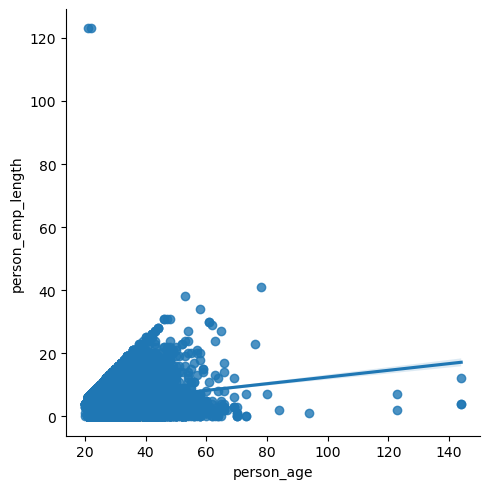

In [31]:
sns.lmplot(data=df,x='person_age',y='person_emp_length')

In [32]:
df.corr(numeric_only=True)['person_emp_length']['person_age']

0.16310557382817698

This is the linear coefficient of person_emp_length and person_age relation

Let's not play with our original data

In [35]:
dfcpy=df.copy()

Let's define the function to fill the missing values and then apply it

In [37]:
def fill_length(x):
    if x.isnull().any():
        return round(0.1631056*x[0])
    else:
        return x[1]

In [38]:
dfcpy['person_emp_length']=df[['person_age','person_emp_length']].apply(fill_length,axis=1)

Now, let's fill the loab_int_rate missing values

<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

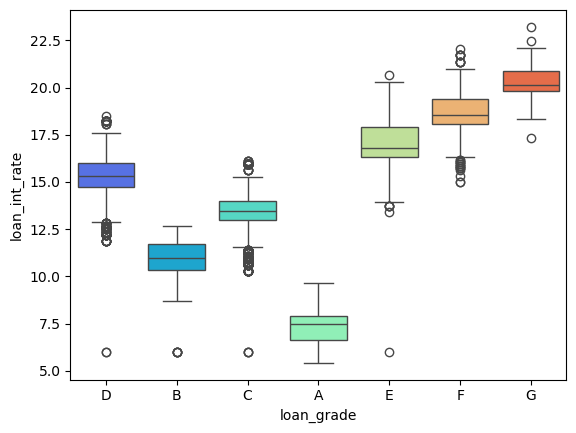

In [40]:
sns.boxplot(data=dfcpy,x='loan_grade',y='loan_int_rate',palette='rainbow')

We can see that the range of loan_int_range is different for each loan_grade. We can use this fact to fill thre values.

In [42]:
dfcpy.groupby('loan_grade').mean(numeric_only=True)['loan_int_rate']

loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [43]:
def fill_rate(x):
    if x.isnull().any():
        if x[0]=='A':
            return 7.33
        elif x[0]=='B':
            return 11.00
        elif x[0]=='C':
            return 13.46
        elif x[0]=='D':
            return 15.36
        elif x[0]=='E':
            return 17.01
        elif x[0]=='F':
            return 18.61
        else:
            return 20.25
    else:
        return x[1]

This function will fill the missing interest rate with the mean value for the loan_grade of that case

In [45]:
dfcpy['loan_int_rate']=df[['loan_grade','loan_int_rate']].apply(fill_rate,axis=1)

In [46]:
dfcpy.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

All the missing values are filled now

In [48]:
list(dfcpy.select_dtypes('object').columns)

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

We have few features with non-numerical data types. Most of the machine learning models require numerical data. So we will convert them into numerical data using get_dummies function of pandas library.

In [50]:
own_dummy=pd.get_dummies(dfcpy['person_home_ownership'],drop_first=True)
intent_dummy=pd.get_dummies(dfcpy['loan_intent'],drop_first=True)
grade_dummy=pd.get_dummies(dfcpy['loan_grade'],drop_first=True)
default_dummy=pd.get_dummies(dfcpy['cb_person_default_on_file'],drop_first=True)

In [51]:
dfcpy=pd.concat([dfcpy,own_dummy,intent_dummy,grade_dummy,default_dummy],axis=1)

Now, let's remove the old non-numerical columns

In [53]:
dfcpy.drop(list(dfcpy.select_dtypes('object').columns),axis=1,inplace=True)

### Train-Test-Split

It's time to perform train_test_split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X=dfcpy.drop('loan_status',axis=1)
y=dfcpy['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We have to scale the data for better performance

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

## Machine Learning and Evaluation

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [62]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score

This code will train each model with training data and then predict the results for test data

In [64]:
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),LGBMClassifier()]
f1=[]
accuracy=[]
recall=[]
precision=[]
for model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    f1.append(f1_score(y_test,pred))
    accuracy.append(accuracy_score(y_test,pred))
    recall.append(recall_score(y_test,pred))
    precision.append(precision_score(y_test,pred))

[LightGBM] [Info] Number of positive: 4955, number of negative: 17851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 22806, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217267 -> initscore=-1.281662
[LightGBM] [Info] Start training from score -1.281662


In [65]:
results=pd.DataFrame(index=['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','XGBoost','LightGBM'])

In [66]:
results['F1 score']=f1
results['Accuracy']=accuracy
results['Recall']=recall
results['Precision']=precision

<Axes: >

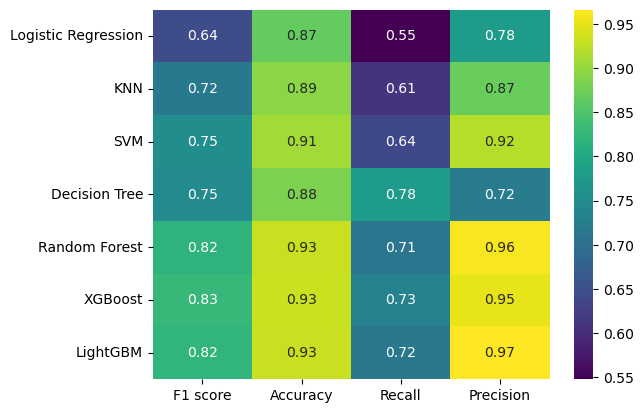

In [67]:
sns.heatmap(results,cmap='viridis',annot=True)

Here we can see that Random Forest, XGBoost, LightGBM performed better than others. XGBoost and LightGBM works really well on non-uniform data.

### Grid Search on Random Forest

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
rfc=RandomForestClassifier()
param_grid = {
    'n_estimators': [300,400,500]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=300; total time=   3.5s
[CV] END ...................................n_estimators=300; total time=   3.5s
[CV] END ...................................n_estimators=300; total time=   3.6s
[CV] END ...................................n_estimators=300; total time=   3.8s
[CV] END ...................................n_estimators=300; total time=   3.6s
[CV] END ...................................n_estimators=400; total time=   4.9s
[CV] END ...................................n_estimators=400; total time=   4.8s
[CV] END ...................................n_estimators=400; total time=   4.8s
[CV] END ...................................n_estimators=400; total time=   4.7s
[CV] END ...................................n_estimators=400; total time=   4.7s
[CV] END ...................................n_estimators=500; total time=   5.9s
[CV] END ...................................n_est

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [300, 400, 500]}, verbose=2)

Best parameter is 

In [72]:
grid_search.best_params_

{'n_estimators': 500}

In [73]:
pred=grid_search.predict(X_test)

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7622
           1       0.97      0.71      0.82      2153

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.93      0.93      0.93      9775



Grid Search has improved the performance for Random Forest

### Grid Search on XGBoost

In [76]:
xgb=XGBClassifier()
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.05,0.025]
}

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END ................learning_rate=0.1, n_estimators=300; total time=   0.2s
[CV] END ................learning_rate=0.1, n_est

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.025],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

Best parameters are

In [78]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [79]:
pred=grid_search.predict(X_test)

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7622
           1       0.96      0.72      0.82      2153

    accuracy                           0.93      9775
   macro avg       0.94      0.86      0.89      9775
weighted avg       0.93      0.93      0.93      9775



Grid Search has improved the performance for XGBoost

#### Grid Search on LightGBM

In [82]:
lgbm=LGBMClassifier()
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.05,0.025]
}

grid_search = GridSearchCV(estimator = lgbm, param_grid = param_grid, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 3964, number of negative: 14280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 18244, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217277 -> initscore=-1.281606
[LightGBM] [Info] Start training from score -1.281606
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[LightGBM] [Info] Number of positive: 3964, number of negative: 14281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightG

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.025],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [83]:
grid_search.best_params_

{'learning_rate': 0.025, 'n_estimators': 200}

In [84]:
pred=grid_search.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7622
           1       0.97      0.71      0.82      2153

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.93      0.93      0.93      9775



Grid Search has improved the performance for LightGBM

## ROC-AUC

for logistic regression

In [87]:
from sklearn.metrics import roc_curve,roc_auc_score

In [88]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
pred_probs = logmodel.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

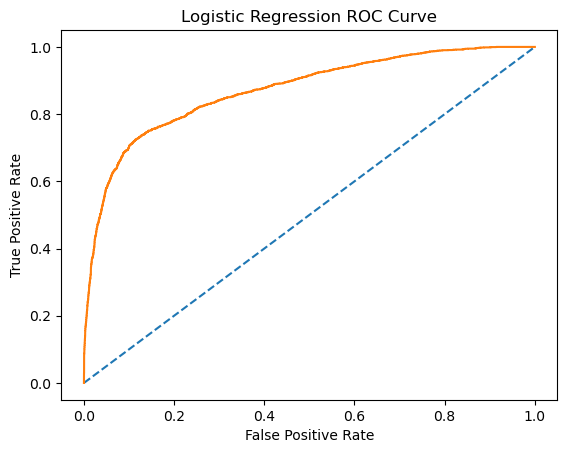

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')

In [90]:
roc_auc_score(y_test,pred_probs)

0.870722819013531

for XGBoost

In [92]:
xgb=XGBClassifier(n_estimators=200,learning_rate=0.1)
xgb.fit(X_train,y_train)
pred_probs = xgb.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'XGBoost ROC Curve')

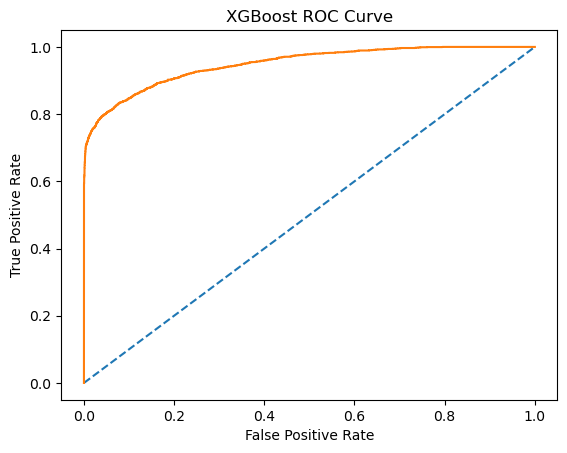

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('XGBoost ROC Curve')

In [94]:
roc_auc_score(y_test,pred_probs)

0.9486376310879487

for LightGBM

In [96]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
pred_probs=lgbm.predict_proba(X_test)[:,1]

[LightGBM] [Info] Number of positive: 4955, number of negative: 17851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 22806, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217267 -> initscore=-1.281662
[LightGBM] [Info] Start training from score -1.281662


Text(0.5, 1.0, 'LightGBM ROC Curve')

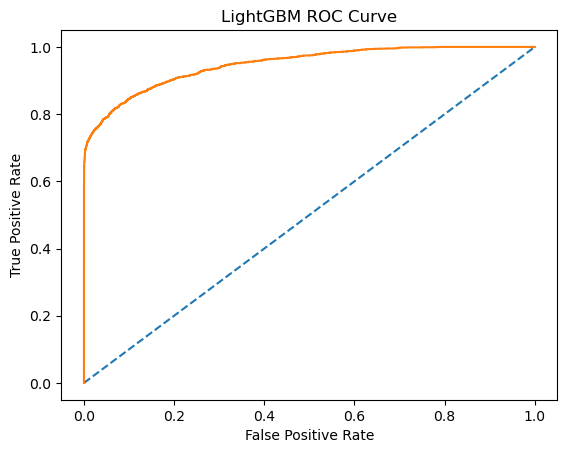

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('LightGBM ROC Curve')

In [98]:
roc_auc_score(y_test,pred_probs)

0.9478366641751216

XGBoost has the best ROC-AUC score.

## Conclusion

This notebook explores credit risk assessment helping financial institutions make informed lending decisions. The dataset containing 11 financial ratios and a 'loan_status' target variable was loaded into a pandas DataFrame. The dataset has 32581 records and 12 features. We performed exploratory data analysis(EDA) to visually understand the data. The given data had some missing values. We filled them with different techniques. Also the data had some non-numerical features. We converted then into numerical data using get_dummies() function. Then we performed train-test-split. We applied different machine learning models and evaluated the performances. Random Forest, XGBoost and LightGBM have done very well despite the non-uniformly distributed data. XGBoost and LightGBM are two most used ML algorithms in Data Science world. Then we performed Grid Search to find best hyperparameters and to improve model's performance. Also we evaluated some models using ROC curve and ROC-AUC score.